### The file used for Activity Recognition using KTH Dataset (Data Augmentation is Used)

# Human Activity Recognition

## Obtain the input files

In [102]:
# Imports
import os
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split

# Loading the data
raw_data = load_files(os.getcwd() + r'/Data', shuffle=False)
files = raw_data['filenames']
targets = raw_data['target']

train_files, test_files, train_targets, test_targets = train_test_split(files, targets, test_size=100, random_state=196)

valid_files = train_files[300:]
valid_targets = train_targets[300:]

train_files = train_files[:300]
train_targets = train_targets[:300]

# Generic details about the data
print('Total number of videos:', len(files))
print('\nNumber of videos in training data:', train_files.shape[0])
print('Number of videos in validation data:', valid_files.shape[0])
print('Number of videos in test data:', test_files.shape[0])

('Total number of videos:', 522)
('\nNumber of videos in training data:', 300)
('Number of videos in validation data:', 122)
('Number of videos in test data:', 100)


### Description of the class labels

In [103]:
print('The categorical labels are converted into integers.\nFollowing is the mapping - \n')
for label in zip(range(6), raw_data['target_names']):
    print(label)

The categorical labels are converted into integers.
Following is the mapping - 

(0, 'boxing')
(1, 'handclapping')
(2, 'handwaving')
(3, 'jogging')
(4, 'running')
(5, 'walking')


### Each video file is associated with its class label

In [104]:
# Displaying the first 5 videos (paths) in the training data along with their labels
# (path of video, class label)
for pair in zip(train_files[:5], train_targets[:5]):
    print(pair)

('/home/geet/project/implementation/CNN/Data/handclapping/person21_handclapping_d1_uncomp.avi', 1)
('/home/geet/project/implementation/CNN/Data/jogging/person21_jogging_d3_uncomp.avi', 3)
('/home/geet/project/implementation/CNN/Data/handwaving/person01_handwaving_d1_uncomp.avi', 2)
('/home/geet/project/implementation/CNN/Data/handclapping/person12_handclapping_d4_uncomp.avi', 1)
('/home/geet/project/implementation/CNN/Data/walking/person06_walking_d4_uncomp.avi', 5)


('\nShape of the sample data:', (500, 120, 160, 3))


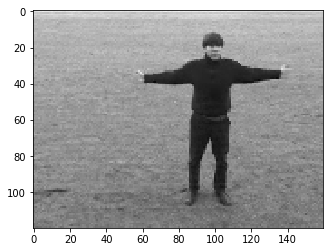

In [105]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import skvideo.io
%matplotlib inline


# The path of a sample video in the training data
sample_files = train_files[:1]

# An object of the class 'Videos'
sample = skvideo.io.vread(sample_files[0]);

print('\nShape of the sample data:', sample.shape)

# Displaying a frame from the sample video
plt.imshow(sample[300])

In [106]:
sec=7
frames_needed=35

In [107]:
import numpy as np
from skvideo.io import FFmpegReader, ffprobe
from skvideo.utils import rgb2gray
from PIL import Image
from keras.preprocessing import image
from tqdm import tqdm
from keras.utils import to_categorical
import cv2
def read_video_bgsub(path,size):


        cap = FFmpegReader(filename=path)
        list_of_frames = []
        fps = int(cap.inputfps)                  # Frame Rate
        
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
        fgbg = cv2.createBackgroundSubtractorMOG2()
        count = 0;
        
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            #print type(temp_image)
            fgmask = fgbg.apply(frame)
            fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
            
            fgmaskimg = Image.fromarray(fgmask)
            
            #print type(fgmask)
            frame = image.img_to_array(
                        fgmaskimg.resize(
                            (size, size),
                            Image.ANTIALIAS)).astype('uint8')
            if index%frame_alternate == 0:
                if count < frames_needed:
                    list_of_frames.append(frame);
                    count= count+1;

        temp_video = np.stack(list_of_frames)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [108]:
def read_video_bgsub_flip(path,size):


        cap = FFmpegReader(filename=path)
        #list_of_frames = []
        list_of_frames2 = []
        fps = int(cap.inputfps)                  # Frame Rate
        #T,M,N,C= cap.getShape()
        #frames=int(T)
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
        fgbg = cv2.createBackgroundSubtractorMOG2()
        count = 0;
        
        
#         total_length = frames/fps
#         excess_len = int((total_length-sec)/6)
        
#         excess_frames = excess_len*fps
        
        remove=0
        
            
            
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            #temp_image2= temp_image.transpose(Image.FLIP_LEFT_RIGHT)
            #temp_image3= image.img_to_array(temp_image2)
            #print type(temp_image)
            fgmask = fgbg.apply(frame)
#             fgmask = image.array_to_image(fgmask)
#             
#             fgmask = image.img_to_array(temp_image2)
            fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
            #print("fgmask:",type(fgmask))
            #fgmask = fgmask.transpose(Image.FLIP_LEFT_RIGHT)
            fgmask = np.flip(fgmask,1)
            fgmaskimg = Image.fromarray(fgmask)
            
            #print type(fgmask)
            #frame = image.img_to_array(
            #            fgmaskimg.resize(
            #                (size, size),
            #                Image.ANTIALIAS)).astype('uint8')
            frame2 = image.img_to_array(
                        fgmaskimg.resize(
                            (size, size),
                            Image.ANTIALIAS)).astype('uint8')
            
            #remove+=1
            if index%frame_alternate == 0:
                if count < frames_needed:
                    #list_of_frames.append(frame);
                    list_of_frames2.append(frame2);
                    count= count+1;

        temp_video = np.stack(list_of_frames2)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [109]:
def read_video(path):


        cap = FFmpegReader(filename=path)
        list_of_frames = []
        fps = int(cap.inputfps)                  # Frame Rate
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        count = 0;
        
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            frame = image.img_to_array(
                        temp_image.resize(
                            (20, 20),
                            Image.ANTIALIAS)).astype('uint8')
            if index%frame_alternate == 0:
                if count < frames_needed:
                    list_of_frames.append(frame);
                    count= count+1;

        temp_video = np.stack(list_of_frames)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [110]:
def read_video_flip(path):


        cap = FFmpegReader(filename=path)
        list_of_frames = []
        list_of_frames2 = []
        fps = int(cap.inputfps)                  # Frame Rate
#         T,M,N,C= cap.getShape()
#         frames=int(T)
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        count = 0;
        
#         total_length = frames/fps
#         excess_len = int((total_length-sec)/6)
        
#         excess_frames = excess_len*fps
        
        remove=0
                    
            
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            temp_image2= temp_image.transpose(Image.FLIP_LEFT_RIGHT)
#             frame = image.img_to_array(
#                         temp_image.resize(
#                             (20, 20),
#                             Image.ANTIALIAS)).astype('uint8')
            frame2 = image.img_to_array(
                        temp_image2.resize(
                            (20, 20),
                            Image.ANTIALIAS)).astype('uint8')
#             remove+=1
            if index%frame_alternate == 0:
                if count < frames_needed:
                    #list_of_frames.append(frame);
                    list_of_frames2.append(frame2);
                    count= count+1;

        temp_video = np.stack(list_of_frames2)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [111]:
def read_videos(paths):
 
        list_of_videos = []
        list_of_videos_flip = []
        list_of_videos = [
            read_video(path) for path in tqdm(paths)
        ]
        list_of_videos_flip = [
            read_video_flip(path) for path in tqdm(paths)
        ]

        #print("shape1:", list_of_videos[:].shape)
        list_of_videos+=list_of_videos_flip
        videos = np.vstack(list_of_videos)

        #base = self.normalize_pixels[0]
        #r = self.normalize_pixels[1] - base
        min_ = np.min(videos, axis=(1, 2, 3), keepdims=True)
        max_ = np.max(videos, axis=(1, 2, 3), keepdims=True)
        #return ((videos.astype('float32') - min_) / (max_ - min_)) * r + base
        return ((videos.astype('float32') - min_) / (max_ - min_))


In [112]:
def read_videos_bgsub(paths, size):
     
        #print("shape1:", list_of_videos[:].shape)
        list_of_videos = []
        list_of_videos_flip = []
        list_of_videos = [
            read_video_bgsub(path, size) for path in tqdm(paths)
        ]
        list_of_videos_flip = [
            read_video_bgsub_flip(path, size) for path in tqdm(paths)
        ]
        
        list_of_videos+=list_of_videos_flip
        videos = np.vstack(list_of_videos)

        #base = self.normalize_pixels[0]
        #r = self.normalize_pixels[1] - base
        min_ = np.min(videos, axis=(1, 2, 3), keepdims=True)
        max_ = np.max(videos, axis=(1, 2, 3), keepdims=True)
        #return ((videos.astype('float32') - min_) / (max_ - min_)) * r + base
        return ((videos.astype('float32') - min_) / (max_ - min_))

In [113]:
# Reading training videos and one-hot encoding the training labels
X_train = read_videos(train_files)
y_train = to_categorical(train_targets, num_classes=6)
y_train = np.concatenate((y_train,y_train))
print('Shape of training data:', X_train.shape)
print('Shape of training labels:', y_train.shape)

100%|██████████| 300/300 [02:22<00:00,  2.15it/s]

('Shape of training data:', (600, 35, 20, 20, 1))
('Shape of training labels:', (600, 6))


In [114]:
# Reading validation videos and one-hot encoding the validation labels
X_valid = read_videos(valid_files)
y_valid = to_categorical(valid_targets, num_classes=6)

X_train =  np.concatenate((X_train,X_valid[122:]))
y_train = np.concatenate((y_train,y_valid))
X_valid = X_valid[:122]
print('Shape of validation data:', X_valid.shape)
print('Shape of validation labels:', y_valid.shape)
print('Shape of Train data:', X_train.shape)
print('Shape of Train labels:', y_train.shape)

100%|██████████| 122/122 [00:56<00:00,  2.10it/s]

('Shape of validation data:', (122, 35, 20, 20, 1))
('Shape of validation labels:', (122, 6))
('Shape of Train data:', (722, 35, 20, 20, 1))
('Shape of Train labels:', (722, 6))


In [115]:
# Reading testing videos and one-hot encoding the testing labels
X_test = read_videos(test_files)
y_test = to_categorical(test_targets, num_classes=6)
X_test = X_test[:100]
print('Shape of testing data:', X_test.shape)
print('Shape of testing labels:', y_test.shape)

100%|██████████| 100/100 [00:50<00:00,  2.14it/s]

('Shape of testing data:', (100, 35, 20, 20, 1))
('Shape of testing labels:', (100, 6))


In [116]:
X_train_bgsub = read_videos_bgsub(train_files,20)
y_train_bgsub = to_categorical(train_targets, num_classes=6)
y_train_bgsub = np.concatenate((y_train_bgsub,y_train_bgsub))

print('Shape of training data:', X_train_bgsub.shape)
print('Shape of training labels:', y_train_bgsub.shape)

100%|██████████| 300/300 [04:15<00:00,  1.20it/s]

('Shape of training data:', (600, 35, 20, 20, 1))
('Shape of training labels:', (600, 6))


In [117]:
X_test_bgsub = read_videos_bgsub(test_files,20)
y_test_bgsub = to_categorical(test_targets, num_classes=6)
X_test_bgsub = X_test_bgsub[:100]
print('Shape of testing data:', X_test_bgsub.shape)
print('Shape of testing labels:', y_test_bgsub.shape)

100%|██████████| 100/100 [01:31<00:00,  1.19it/s]

('Shape of testing data:', (100, 35, 20, 20, 1))
('Shape of testing labels:', (100, 6))


In [118]:
X_valid_bgsub = read_videos_bgsub(valid_files,20)
y_valid_bgsub = to_categorical(valid_targets, num_classes=6)

X_train_bgsub =  np.concatenate((X_train_bgsub,X_valid_bgsub[122:]))
y_train_bgsub = np.concatenate((y_train_bgsub,y_valid_bgsub))
X_valid_bgsub = X_valid_bgsub[:122]
print('Shape of validation data:', X_valid_bgsub.shape)
print('Shape of validation labels:', y_valid_bgsub.shape)

100%|██████████| 122/122 [01:59<00:00,  1.16it/s]

('Shape of validation data:', (122, 35, 20, 20, 1))
('Shape of validation labels:', (122, 6))


In [97]:
print(X_train_bgsub[2])

[[[[0.49803922]
   [0.49803922]
   [0.49803922]
   ...
   [0.49803922]
   [0.49803922]
   [0.49803922]]

  [[0.49803922]
   [0.49803922]
   [0.49803922]
   ...
   [0.49803922]
   [0.49803922]
   [0.49803922]]

  [[0.49803922]
   [0.49803922]
   [0.49803922]
   ...
   [0.49803922]
   [0.49803922]
   [0.49803922]]

  ...

  [[0.49803922]
   [0.49803922]
   [0.49803922]
   ...
   [0.49803922]
   [0.49803922]
   [0.49803922]]

  [[0.49803922]
   [0.49803922]
   [0.49803922]
   ...
   [0.49803922]
   [0.49803922]
   [0.49803922]]

  [[0.49803922]
   [0.49803922]
   [0.49803922]
   ...
   [0.49803922]
   [0.49803922]
   [0.49803922]]]


 [[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.        ]
   [0. 

('Class of 1st video:', 5)


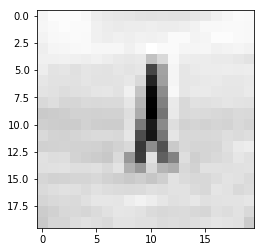

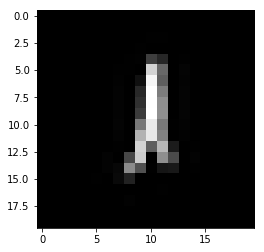

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline

# After pre-processing

# Displaying the 10th frame of the first processed video from the training data
print("Class of 1st video:",y_train[0].argmax());
plt.imshow(np.squeeze(X_train[0][10], axis=2), cmap='gray')
plt.show()
plt.imshow(np.squeeze(X_train_bgsub[0][10], axis=2), cmap='gray')

100%|██████████| 10/10 [00:08<00:00,  1.13it/s]


('Shape of validation data:', (20, 35, 20, 20, 1))
('Shape of validation labels:', (20, 35, 20, 20, 1))
['/home/geet/project/implementation/CNN/Data/walking/person20_walking_d3_uncomp.avi'
 '/home/geet/project/implementation/CNN/Data/running/person05_running_d4_uncomp.avi'
 '/home/geet/project/implementation/CNN/Data/boxing/person16_boxing_d3_uncomp.avi'
 '/home/geet/project/implementation/CNN/Data/jogging/person13_jogging_d1_uncomp.avi'
 '/home/geet/project/implementation/CNN/Data/boxing/person17_boxing_d1_uncomp.avi'
 '/home/geet/project/implementation/CNN/Data/handclapping/person10_handclapping_d3_uncomp.avi'
 '/home/geet/project/implementation/CNN/Data/jogging/person01_jogging_d2_uncomp.avi'
 '/home/geet/project/implementation/CNN/Data/handwaving/person14_handwaving_d1_uncomp.avi'
 '/home/geet/project/implementation/CNN/Data/handclapping/person08_handclapping_d1_uncomp.avi'
 '/home/geet/project/implementation/CNN/Data/walking/person11_walking_d1_uncomp.avi'
 '/home/geet/project/imp

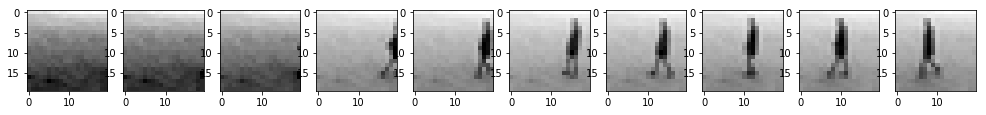

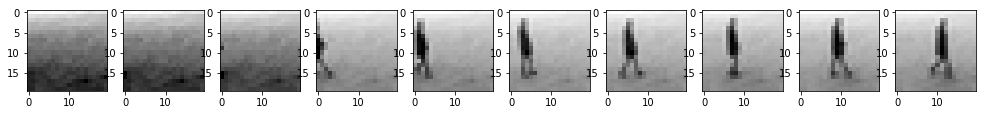

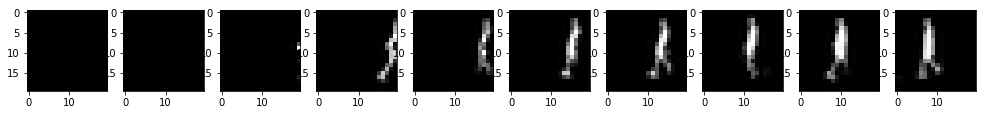

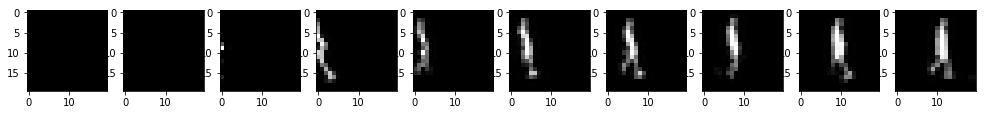

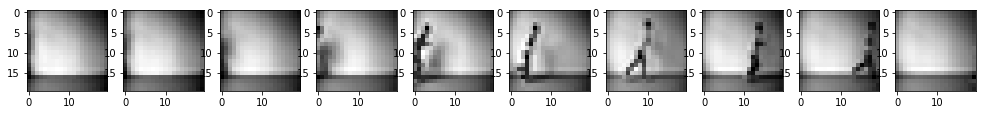

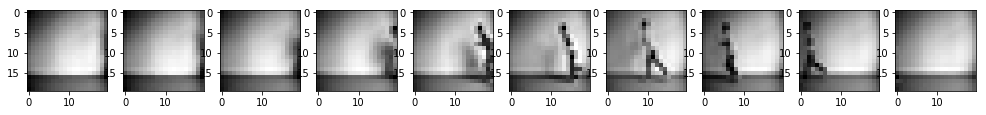

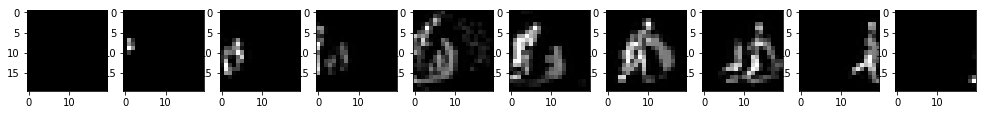

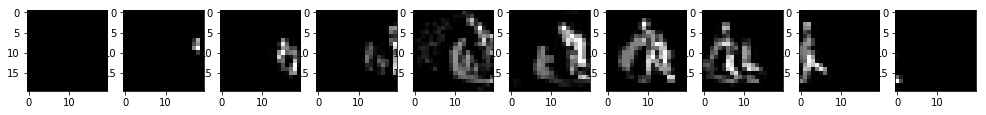

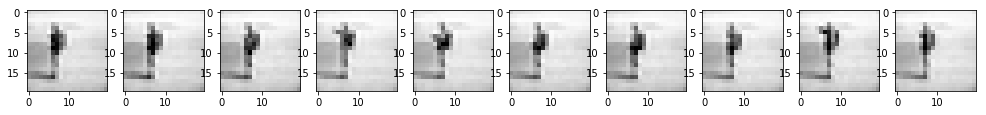

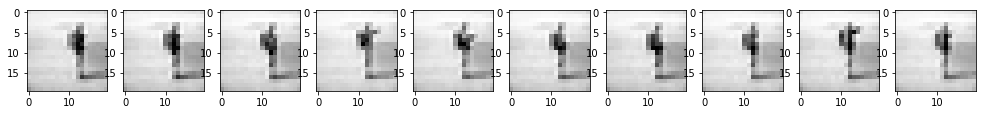

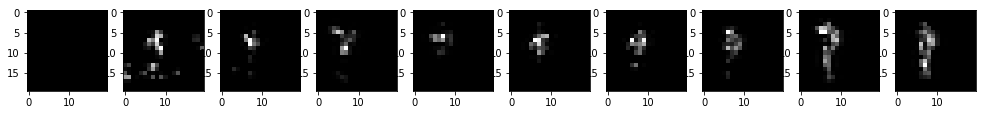

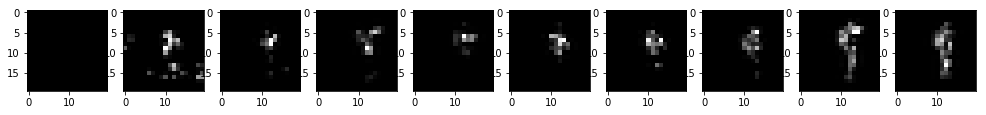

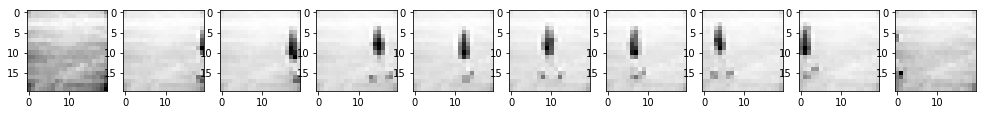

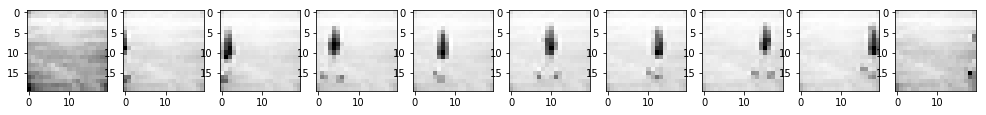

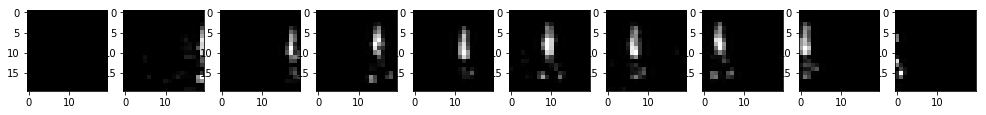

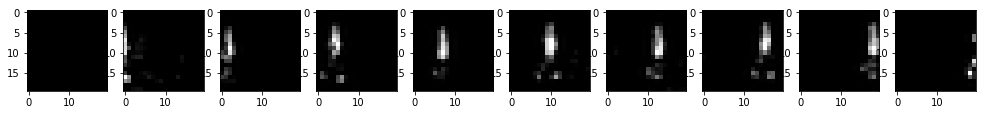

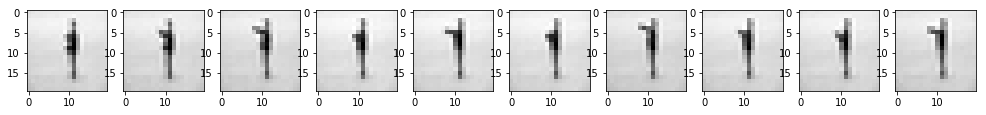

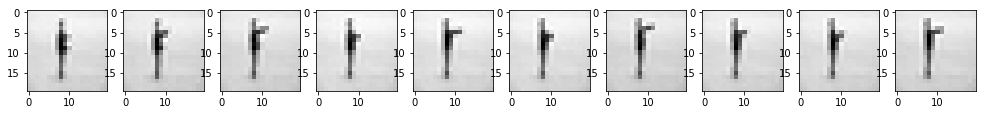

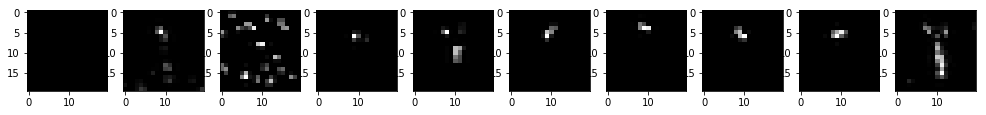

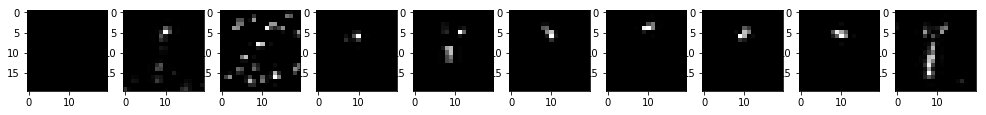

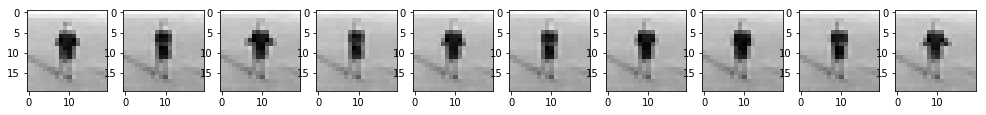

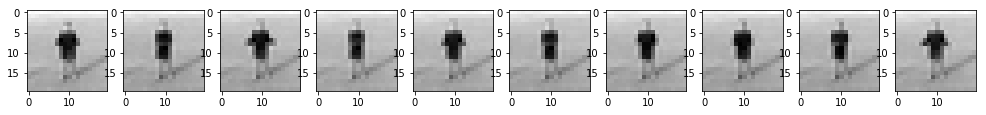

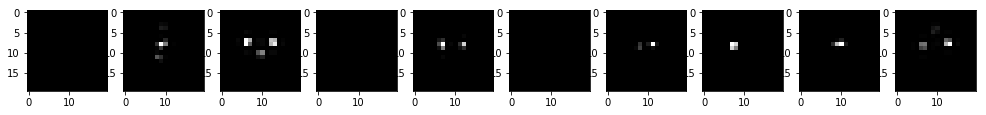

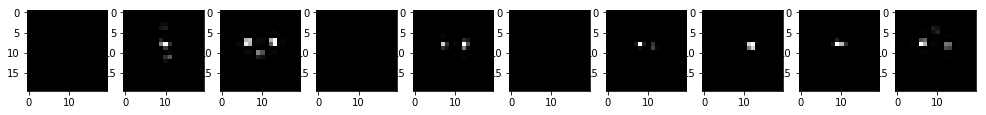

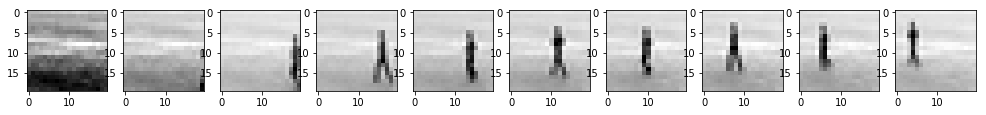

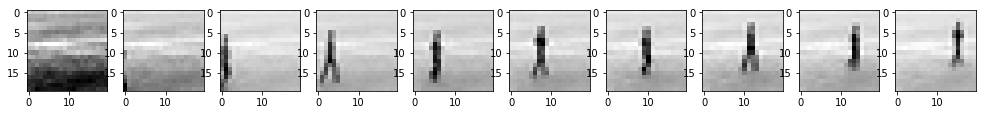

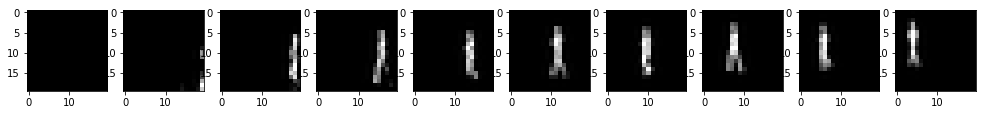

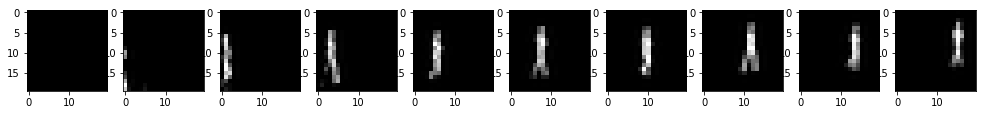

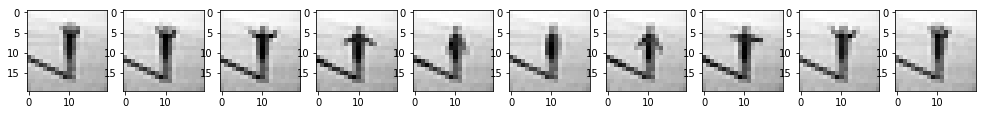

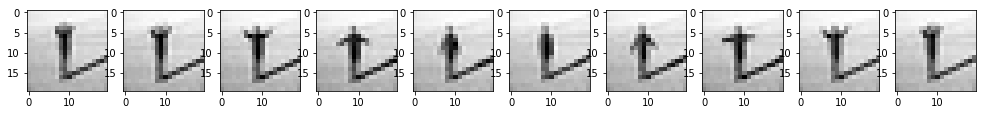

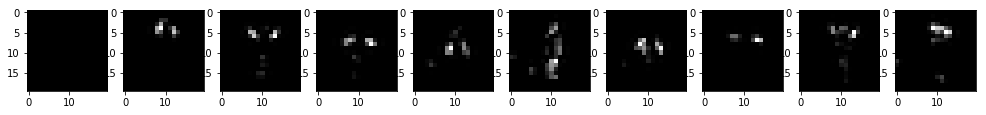

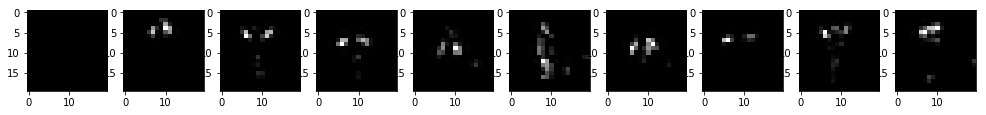

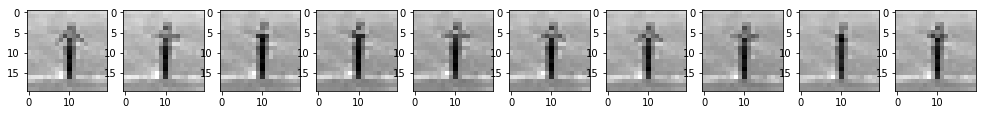

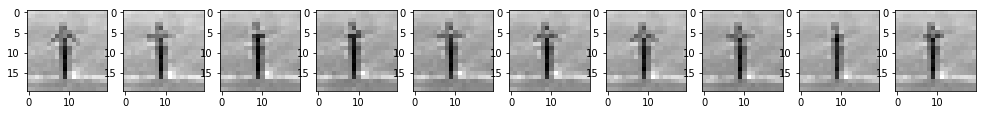

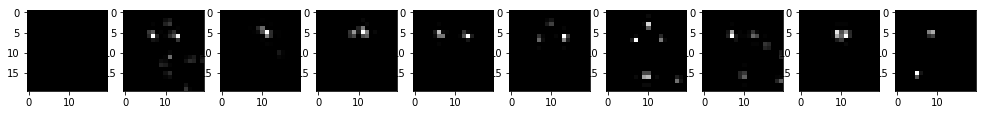

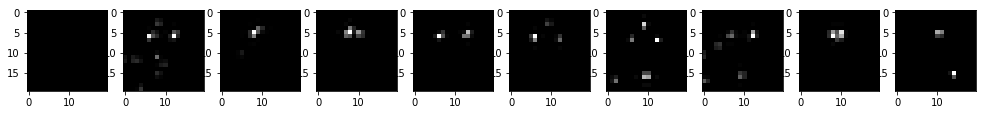

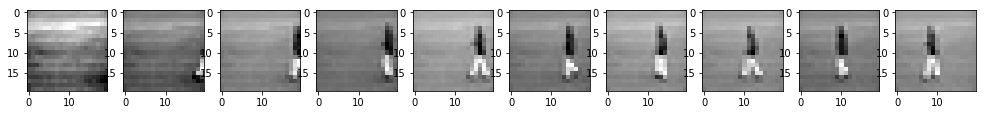

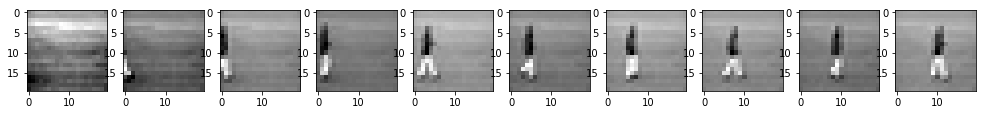

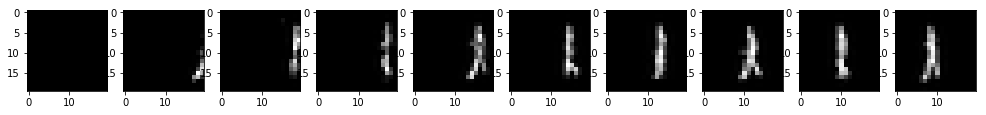

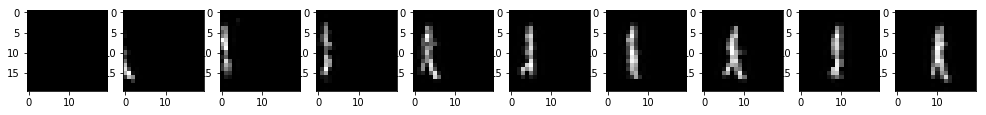

In [70]:
X_sample = read_videos(train_files[20:30])
X_sample_bgsub = read_videos_bgsub(train_files[20:30],20)

print('Shape of validation data:', X_sample.shape)
print('Shape of validation labels:', X_sample_bgsub.shape)
print(train_files[20:50])

from PIL import Image

for j in range(10):
    fig, axes = plt.subplots(1, 10,figsize=(17, 10))
    i=0;


    for frames in X_sample[j][:10]:
    #plt.imshow(frames[0])
            axes[i].imshow(np.squeeze(frames, axis=2), cmap='gray')
            i=i+1;
            #plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

    fig2, axes2 = plt.subplots(1, 10,figsize=(17, 10))
    i=0;
    for frames in X_sample[j+10][:10]:
    #plt.imshow(frames[0])
            axes2[i].imshow(np.squeeze(frames, axis=2), cmap='gray')
            i=i+1;
            #plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
    
   
    fig3, axes3 = plt.subplots(1, 10,figsize=(17, 10))
    i=0;
    for frames in X_sample_bgsub[j][:10]:
    #plt.imshow(frames[0])
            axes3[i].imshow(np.squeeze(frames, axis=2), cmap='gray')
            i=i+1;
            #plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
    
    fig4, axes4 = plt.subplots(1, 10,figsize=(17, 10))
    i=0;
    for frames in X_sample_bgsub[j+10][:10]:
    #plt.imshow(frames[0])
            axes4[i].imshow(np.squeeze(frames, axis=2), cmap='gray')
            i=i+1;
            #plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

# Model 1 without BG Subtraction

In [29]:
# Imports
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense

# Using the Sequential Model
model1 = Sequential()

# Adding Alternate convolutional and pooling layers
model1.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(3, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model1.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model1.add(Conv3D(filters=64, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model1.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))


model1.add(GlobalAveragePooling3D())

model1.add(Dense(32, activation='relu'))

model1.add(Dense(6, activation='softmax'))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 12, 20, 20, 16)    1456      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 12, 10, 10, 16)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 12, 10, 10, 64)    46144     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 12, 5, 5, 64)      0         
_________________________________________________________________
global_average_pooling3d_1 ( (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total para

### Training Model - 1

In [30]:
# Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint1 = ModelCheckpoint(filepath='Model_1.weights.best.hdf5', save_best_only=True, verbose=1)


history1 = model1.fit(X_train, y_train, batch_size=15, epochs=60, validation_data=(X_valid, y_valid), verbose=2, callbacks=[checkpoint1])
#history = model.fit(X_train, y_train, batch_size=16, epochs=40, verbose=2, callbacks=[checkpoint])

Train on 722 samples, validate on 122 samples
Epoch 1/60
 - 15s - loss: 1.7796 - acc: 0.2105 - val_loss: 1.7818 - val_acc: 0.1475

Epoch 00001: val_loss improved from inf to 1.78178, saving model to Model_1.weights.best.hdf5
Epoch 2/60
 - 11s - loss: 1.7719 - acc: 0.2022 - val_loss: 1.7816 - val_acc: 0.1475

Epoch 00002: val_loss improved from 1.78178 to 1.78156, saving model to Model_1.weights.best.hdf5
Epoch 3/60
 - 12s - loss: 1.7679 - acc: 0.2022 - val_loss: 1.7782 - val_acc: 0.1475

Epoch 00003: val_loss improved from 1.78156 to 1.77821, saving model to Model_1.weights.best.hdf5
Epoch 4/60
 - 11s - loss: 1.7626 - acc: 0.1981 - val_loss: 1.7772 - val_acc: 0.1475

Epoch 00004: val_loss improved from 1.77821 to 1.77717, saving model to Model_1.weights.best.hdf5
Epoch 5/60
 - 11s - loss: 1.7798 - acc: 0.2022 - val_loss: 1.7965 - val_acc: 0.1475

Epoch 00005: val_loss did not improve from 1.77717
Epoch 6/60
 - 11s - loss: 1.7545 - acc: 0.2036 - val_loss: 1.7482 - val_acc: 0.1475

Epoch


Epoch 00052: val_loss did not improve from 0.96111
Epoch 53/60
 - 12s - loss: 0.9190 - acc: 0.5485 - val_loss: 0.9381 - val_acc: 0.5328

Epoch 00053: val_loss improved from 0.96111 to 0.93812, saving model to Model_1.weights.best.hdf5
Epoch 54/60
 - 11s - loss: 0.8826 - acc: 0.5693 - val_loss: 0.9560 - val_acc: 0.5410

Epoch 00054: val_loss did not improve from 0.93812
Epoch 55/60
 - 11s - loss: 0.9001 - acc: 0.5388 - val_loss: 0.9850 - val_acc: 0.5902

Epoch 00055: val_loss did not improve from 0.93812
Epoch 56/60
 - 12s - loss: 0.8405 - acc: 0.6011 - val_loss: 0.9262 - val_acc: 0.4836

Epoch 00056: val_loss improved from 0.93812 to 0.92615, saving model to Model_1.weights.best.hdf5
Epoch 57/60
 - 12s - loss: 0.8365 - acc: 0.6163 - val_loss: 0.9877 - val_acc: 0.4836

Epoch 00057: val_loss did not improve from 0.92615
Epoch 58/60
 - 12s - loss: 0.8446 - acc: 0.5983 - val_loss: 0.9137 - val_acc: 0.5328

Epoch 00058: val_loss improved from 0.92615 to 0.91370, saving model to Model_1.wei

### Evaluating Model - 1

In [31]:
# Loading the model that performed the best on the validation set
model1.load_weights('Model_1.weights.best.hdf5')

# Testing the model on the Test data
(loss1, accuracy1) = model1.evaluate(X_test, y_test, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy1 * 100))

Accuracy on test data: 56.00%


## Model - 1 Performance



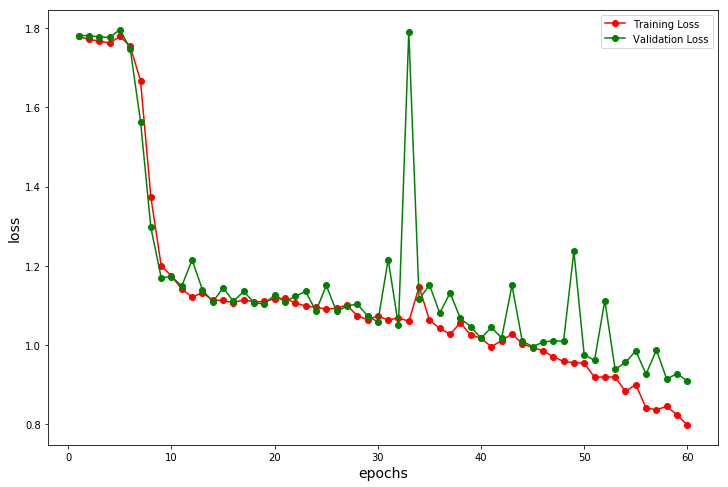

In [32]:
# Making the plot larger
plt.figure(figsize=(12, 8))

loss1 = history1.history['loss']                          # Loss on the training data
val_loss1 = history1.history['val_loss']                  # Loss on the validation data
epochs = range(1,61)

plt.plot(epochs, loss1, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss1, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

In [150]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.GnBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.subplots(1, 1, figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test, y_pred)
#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names,
#                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

#plt.show()


Normalized confusion matrix


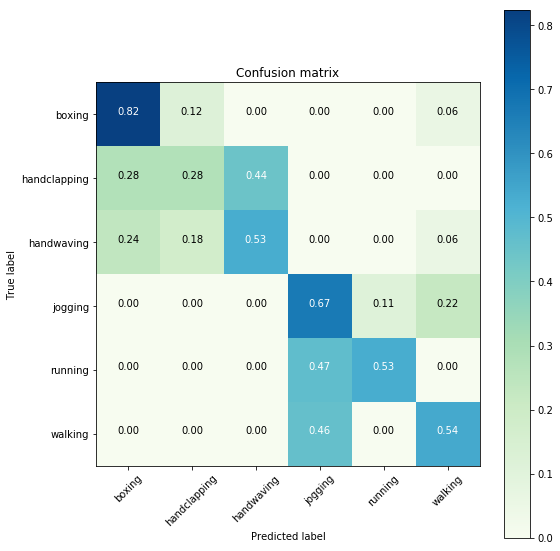

In [34]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions = model1.predict_classes(X_test);
y_pred=to_categorical(y_predictions, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:10]
#print y_test[:10]
model_cnf_matrix = confusion_matrix(y_test_cm,y_pred);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


# Model 1, With BG Subtraction

In [37]:
# Imports
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense

# Using the Sequential Model
model1_bg = Sequential()

# Adding Alternate convolutional and pooling layers
model1_bg.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(3, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model1_bg.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model1_bg.add(Conv3D(filters=64, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model1_bg.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))


model1_bg.add(GlobalAveragePooling3D())

model1_bg.add(Dense(32, activation='relu'))

model1_bg.add(Dense(6, activation='softmax'))

model1_bg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_3 (Conv3D)            (None, 12, 20, 20, 16)    1456      
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 12, 10, 10, 16)    0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 12, 10, 10, 64)    46144     
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 12, 5, 5, 64)      0         
_________________________________________________________________
global_average_pooling3d_2 ( (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 198       
Total para

In [40]:
# Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model1_bg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint_bg = ModelCheckpoint(filepath='Model_1_bg.weights.best.hdf5', save_best_only=True, verbose=1)


history1_bg = model1_bg.fit(X_train_bgsub, y_train_bgsub, batch_size=15, epochs=60, validation_data=(X_valid_bgsub, y_valid_bgsub), verbose=1, callbacks=[checkpoint_bg])
#history = model.fit(X_train, y_train, batch_size=16, epochs=40, verbose=2, callbacks=[checkpoint])

Train on 722 samples, validate on 122 samples
Epoch 1/60
722/722 [==============================] - 13s 18ms/step - loss: 1.7218 - acc: 0.1967 - val_loss: 1.6534 - val_acc: 0.2213

Epoch 00001: val_loss improved from inf to 1.65340, saving model to Model_1_bg.weights.best.hdf5
Epoch 2/60
722/722 [==============================] - 13s 18ms/step - loss: 1.5694 - acc: 0.2327 - val_loss: 1.4912 - val_acc: 0.2705

Epoch 00002: val_loss improved from 1.65340 to 1.49117, saving model to Model_1_bg.weights.best.hdf5
Epoch 3/60
722/722 [==============================] - 13s 17ms/step - loss: 1.3061 - acc: 0.4044 - val_loss: 1.0791 - val_acc: 0.5492

Epoch 00003: val_loss improved from 1.49117 to 1.07911, saving model to Model_1_bg.weights.best.hdf5
Epoch 4/60
722/722 [==============================] - 12s 17ms/step - loss: 1.0357 - acc: 0.5512 - val_loss: 0.9527 - val_acc: 0.6230

Epoch 00004: val_loss improved from 1.07911 to 0.95269, saving model to Model_1_bg.weights.best.hdf5
Epoch 5/60
722

722/722 [==============================] - 13s 18ms/step - loss: 0.3231 - acc: 0.8712 - val_loss: 0.4648 - val_acc: 0.8279

Epoch 00040: val_loss did not improve from 0.42618
Epoch 41/60
722/722 [==============================] - 12s 17ms/step - loss: 0.3090 - acc: 0.8753 - val_loss: 0.5279 - val_acc: 0.7705

Epoch 00041: val_loss did not improve from 0.42618
Epoch 42/60
722/722 [==============================] - 12s 17ms/step - loss: 0.3021 - acc: 0.8795 - val_loss: 0.4111 - val_acc: 0.8525

Epoch 00042: val_loss improved from 0.42618 to 0.41115, saving model to Model_1_bg.weights.best.hdf5
Epoch 43/60
722/722 [==============================] - 12s 17ms/step - loss: 0.3076 - acc: 0.8740 - val_loss: 0.4463 - val_acc: 0.8115

Epoch 00043: val_loss did not improve from 0.41115
Epoch 44/60
722/722 [==============================] - 12s 17ms/step - loss: 0.3212 - acc: 0.8781 - val_loss: 0.5173 - val_acc: 0.8197

Epoch 00044: val_loss did not improve from 0.41115
Epoch 45/60
722/722 [======

In [41]:
model1_bg.load_weights('Model_1_bg.weights.best.hdf5')

# Testing the model on the Test data
(loss1_bg, accuracy1_bg) = model1_bg.evaluate(X_test_bgsub, y_test_bgsub, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy1_bg * 100))

Accuracy on test data: 78.00%


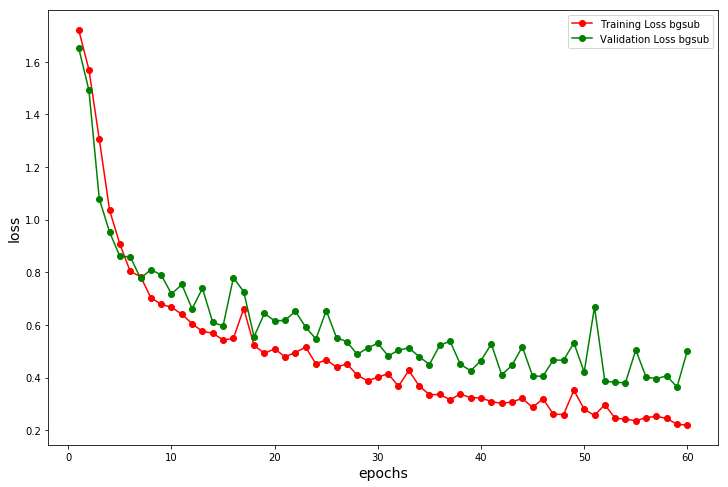

In [42]:
plt.figure(figsize=(12, 8))

loss1_bg = history1_bg.history['loss']                          # Loss on the training data
val_loss1_bg = history1_bg.history['val_loss']                  # Loss on the validation data
epochs = range(1,61)

plt.plot(epochs, loss1_bg, 'ro-', label='Training Loss bgsub')
plt.plot(epochs, val_loss1_bg, 'go-', label = 'Validation Loss bgsub')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

Normalized confusion matrix


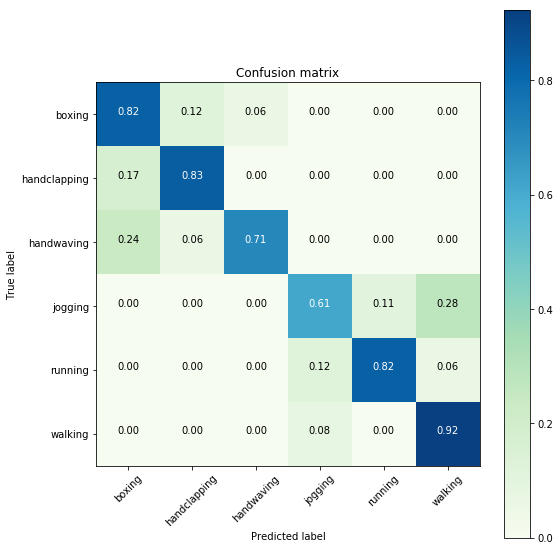

In [43]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions = model1_bg.predict_classes(X_test_bgsub);
y_pred=to_categorical(y_predictions, num_classes=6).argmax(axis=1);
y_test_cm = y_test_bgsub.argmax(axis=1);
#print y_predictions[:10]
#print y_test[:10]
model_cnf_matrix = confusion_matrix(y_test_cm,y_pred);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


## Comparision of Model1 with BG-sub and without BG-sub

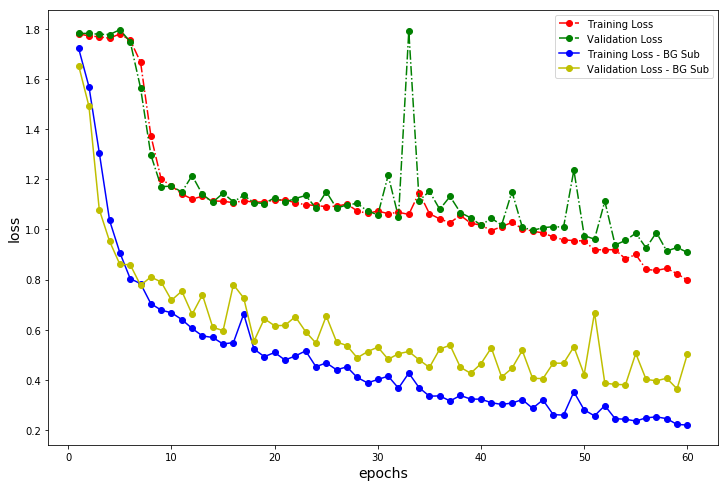

In [44]:
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss1, 'ro-.', label='Training Loss')
plt.plot(epochs, val_loss1, 'go-.', label = 'Validation Loss')
plt.plot(epochs, loss1_bg, 'bo-', label='Training Loss - BG Sub')
plt.plot(epochs, val_loss1_bg, 'yo-', label = 'Validation Loss - BG Sub')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

## Model - 2


In [45]:
# Imports
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model2 = Sequential()


model2.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(5, 2, 2), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model2.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model2.add(Conv3D(filters=64, kernel_size=(5, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))
model2.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model2.add(Conv3D(filters=256, kernel_size=(3, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))
model2.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))


model2.add(GlobalAveragePooling3D())

model2.add(Dense(32, activation='relu'))

#model2.add(Dropout(0.5))

model2.add(Dense(6, activation='softmax'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_5 (Conv3D)            (None, 7, 10, 10, 16)     1456      
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 7, 5, 5, 16)       0         
_________________________________________________________________
conv3d_6 (Conv3D)            (None, 3, 5, 5, 64)       46144     
_________________________________________________________________
max_pooling3d_6 (MaxPooling3 (None, 3, 3, 3, 64)       0         
_________________________________________________________________
conv3d_7 (Conv3D)            (None, 1, 3, 3, 256)      442624    
_________________________________________________________________
max_pooling3d_7 (MaxPooling3 (None, 1, 2, 2, 256)      0         
_________________________________________________________________
global_average_pooling3d_3 ( (None, 256)               0         
__________

### Training Model - 2


In [46]:
# Imports
from keras.callbacks import ModelCheckpoint
from keras import optimizers

# Compiling the model
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#adam=optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
#model2.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

#model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# Saving the model that performed the best on the validation set
checkpoint2 = ModelCheckpoint(filepath='Model_2.weights.best.hdf5', save_best_only=True, verbose=1)

history2 = model2.fit(X_train, y_train, batch_size=15, epochs=60, 
                    validation_data=(X_valid, y_valid), verbose=2, callbacks=[checkpoint2])

Train on 722 samples, validate on 122 samples
Epoch 1/60
 - 3s - loss: 1.7819 - acc: 0.1856 - val_loss: 1.7726 - val_acc: 0.2131

Epoch 00001: val_loss improved from inf to 1.77255, saving model to Model_2.weights.best.hdf5
Epoch 2/60
 - 2s - loss: 1.5544 - acc: 0.2632 - val_loss: 1.2890 - val_acc: 0.3934

Epoch 00002: val_loss improved from 1.77255 to 1.28900, saving model to Model_2.weights.best.hdf5
Epoch 3/60
 - 2s - loss: 1.2114 - acc: 0.3504 - val_loss: 1.1837 - val_acc: 0.2951

Epoch 00003: val_loss improved from 1.28900 to 1.18373, saving model to Model_2.weights.best.hdf5
Epoch 4/60
 - 2s - loss: 1.1493 - acc: 0.3684 - val_loss: 1.0859 - val_acc: 0.5082

Epoch 00004: val_loss improved from 1.18373 to 1.08587, saving model to Model_2.weights.best.hdf5
Epoch 5/60
 - 2s - loss: 1.0647 - acc: 0.4183 - val_loss: 0.9758 - val_acc: 0.4754

Epoch 00005: val_loss improved from 1.08587 to 0.97582, saving model to Model_2.weights.best.hdf5
Epoch 6/60
 - 2s - loss: 1.1017 - acc: 0.4474 - 


Epoch 00056: val_loss did not improve from 0.53299
Epoch 57/60
 - 3s - loss: 0.0807 - acc: 0.9751 - val_loss: 0.7922 - val_acc: 0.7459

Epoch 00057: val_loss did not improve from 0.53299
Epoch 58/60
 - 2s - loss: 0.1458 - acc: 0.9668 - val_loss: 0.9350 - val_acc: 0.6967

Epoch 00058: val_loss did not improve from 0.53299
Epoch 59/60
 - 2s - loss: 0.1643 - acc: 0.9474 - val_loss: 0.8759 - val_acc: 0.7705

Epoch 00059: val_loss did not improve from 0.53299
Epoch 60/60
 - 3s - loss: 0.0967 - acc: 0.9640 - val_loss: 0.6960 - val_acc: 0.7459

Epoch 00060: val_loss did not improve from 0.53299


### Evaluating Model - 2

Evaluating `Model-2` on the test data.

In [47]:
# Loading the model that performed the best on the validation set
model2.load_weights('Model_2.weights.best.hdf5')

# Testing the model on the Test data
(loss2, accuracy2) = model2.evaluate(X_test, y_test, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy2 * 100))

Accuracy on test data: 62.00%


## Model - 2 Performance



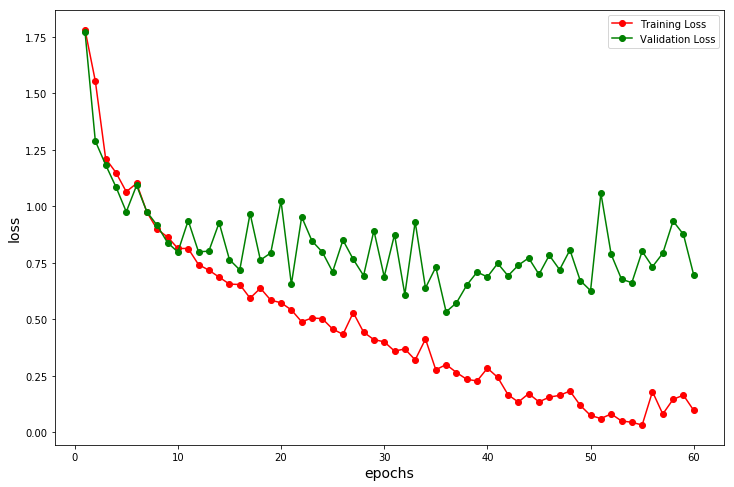

In [48]:
# Making the plot larger
plt.figure(figsize=(12, 8))

loss2 = history2.history['loss']                          # Loss on the training data
val_loss2 = history2.history['val_loss']                  # Loss on the validation data
epochs = range(1, 61)

plt.plot(epochs, loss2, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss2, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

Normalized confusion matrix


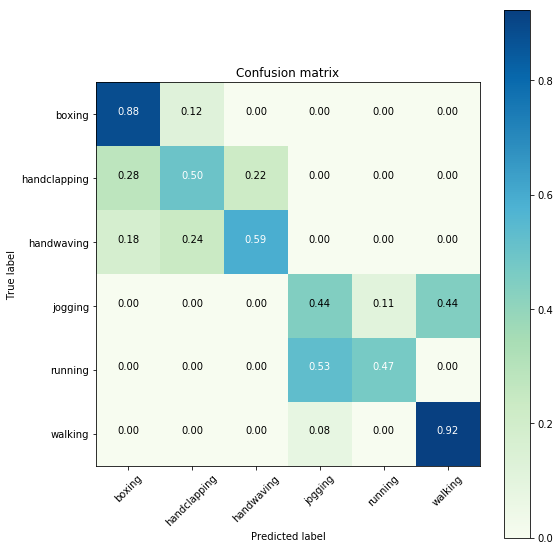

In [49]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions2 = model2.predict_classes(X_test);
y_pred2=to_categorical(y_predictions2, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:10]
#print y_test[:10]
model_cnf_matrix = confusion_matrix(y_test_cm,y_pred2);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


# Model 2 - With BG

In [50]:
# Imports
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model2_bg = Sequential()


model2_bg.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(5, 2, 2), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model2_bg.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model2_bg.add(Conv3D(filters=64, kernel_size=(5, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))
model2_bg.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model2_bg.add(Conv3D(filters=256, kernel_size=(3, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))
model2_bg.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))


model2_bg.add(GlobalAveragePooling3D())

model2_bg.add(Dense(32, activation='relu'))

#model2.add(Dropout(0.5))

model2_bg.add(Dense(6, activation='softmax'))

model2_bg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_8 (Conv3D)            (None, 7, 10, 10, 16)     1456      
_________________________________________________________________
max_pooling3d_8 (MaxPooling3 (None, 7, 5, 5, 16)       0         
_________________________________________________________________
conv3d_9 (Conv3D)            (None, 3, 5, 5, 64)       46144     
_________________________________________________________________
max_pooling3d_9 (MaxPooling3 (None, 3, 3, 3, 64)       0         
_________________________________________________________________
conv3d_10 (Conv3D)           (None, 1, 3, 3, 256)      442624    
_________________________________________________________________
max_pooling3d_10 (MaxPooling (None, 1, 2, 2, 256)      0         
_________________________________________________________________
global_average_pooling3d_4 ( (None, 256)               0         
__________

In [51]:
# Imports
from keras.callbacks import ModelCheckpoint
from keras import optimizers

# Compiling the model
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#adam=optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
#model2.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

#model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2_bg.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# Saving the model that performed the best on the validation set
checkpoint2_bg = ModelCheckpoint(filepath='Model_2_bg.weights.best.hdf5', save_best_only=True, verbose=1)


history2_bg = model2_bg.fit(X_train_bgsub, y_train_bgsub, batch_size=15, epochs=60, 
                    validation_data=(X_valid_bgsub, y_valid_bgsub), verbose=2, callbacks=[checkpoint2_bg])

Train on 722 samples, validate on 122 samples
Epoch 1/60
 - 4s - loss: 1.4783 - acc: 0.3892 - val_loss: 1.1176 - val_acc: 0.5164

Epoch 00001: val_loss improved from inf to 1.11760, saving model to Model_2_bg.weights.best.hdf5
Epoch 2/60
 - 2s - loss: 1.0064 - acc: 0.5679 - val_loss: 0.8437 - val_acc: 0.6311

Epoch 00002: val_loss improved from 1.11760 to 0.84369, saving model to Model_2_bg.weights.best.hdf5
Epoch 3/60
 - 3s - loss: 0.7501 - acc: 0.7022 - val_loss: 0.7036 - val_acc: 0.7049

Epoch 00003: val_loss improved from 0.84369 to 0.70357, saving model to Model_2_bg.weights.best.hdf5
Epoch 4/60
 - 3s - loss: 0.6100 - acc: 0.7438 - val_loss: 0.8092 - val_acc: 0.6148

Epoch 00004: val_loss did not improve from 0.70357
Epoch 5/60
 - 2s - loss: 0.6154 - acc: 0.7368 - val_loss: 0.6482 - val_acc: 0.7459

Epoch 00005: val_loss improved from 0.70357 to 0.64821, saving model to Model_2_bg.weights.best.hdf5
Epoch 6/60
 - 3s - loss: 0.4728 - acc: 0.8033 - val_loss: 0.5673 - val_acc: 0.7705


 - 2s - loss: 3.3591e-04 - acc: 1.0000 - val_loss: 0.9296 - val_acc: 0.8525

Epoch 00058: val_loss did not improve from 0.47889
Epoch 59/60
 - 2s - loss: 2.8054e-04 - acc: 1.0000 - val_loss: 0.9291 - val_acc: 0.8525

Epoch 00059: val_loss did not improve from 0.47889
Epoch 60/60
 - 2s - loss: 2.6256e-04 - acc: 1.0000 - val_loss: 0.9345 - val_acc: 0.8525

Epoch 00060: val_loss did not improve from 0.47889


In [52]:
# Loading the model that performed the best on the validation set
model2_bg.load_weights('Model_2_bg.weights.best.hdf5')

# Testing the model on the Test data
(loss2_bg, accuracy2_bg) = model2_bg.evaluate(X_test_bgsub, y_test_bgsub, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy2_bg * 100))

Accuracy on test data: 76.00%


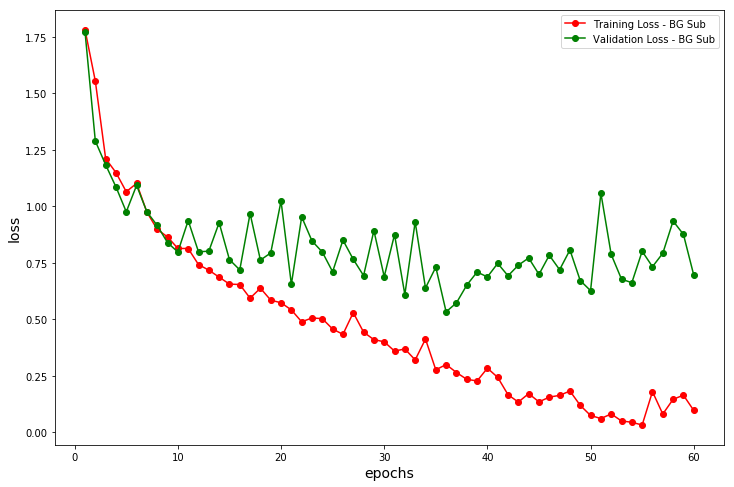

In [53]:
# Making the plot larger
plt.figure(figsize=(12, 8))

loss2_bg = history2_bg.history['loss']                          # Loss on the training data
val_loss2_bg = history2_bg.history['val_loss']                  # Loss on the validation data
epochs = range(1, 61)

plt.plot(epochs, loss2, 'ro-', label='Training Loss - BG Sub')
plt.plot(epochs, val_loss2, 'go-', label = 'Validation Loss - BG Sub')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

Normalized confusion matrix


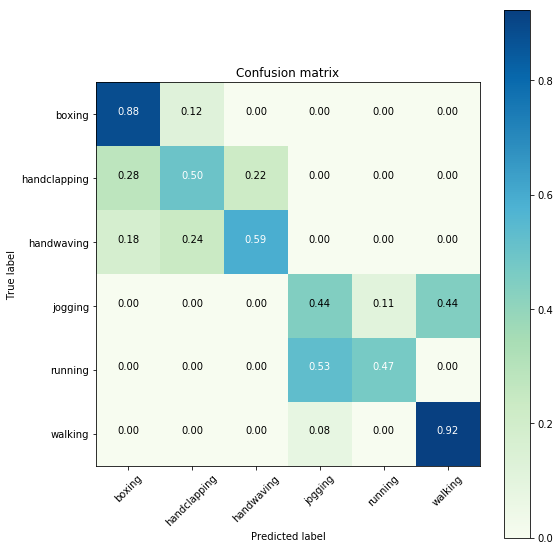

In [54]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions2_bg = model2_bg.predict_classes(X_test_bgsub);
y_pred2_bg=to_categorical(y_predictions2, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:10]
#print y_test[:10]
model_cnf_matrix = confusion_matrix(y_test_cm,y_pred2_bg);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


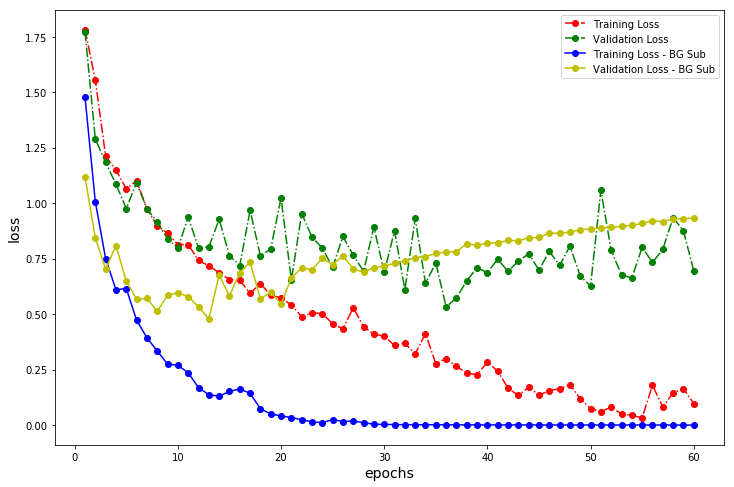

In [55]:
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss2, 'ro-.', label='Training Loss')
plt.plot(epochs, val_loss2, 'go-.', label = 'Validation Loss')
plt.plot(epochs, loss2_bg, 'bo-', label='Training Loss - BG Sub')
plt.plot(epochs, val_loss2_bg, 'yo-', label = 'Validation Loss - BG Sub')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

# The model that worked

In [161]:
# from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, BatchNormalization
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model3 = Sequential()

# Adding Alternate convolutional and pooling layers
model3.add(Conv3D(filters=16, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3.add(Conv3D(filters=64, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3.add(Conv3D(filters=256, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

#model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 1024
model3.add(GlobalAveragePooling3D())

# Hidden layer
model3.add(Dense(32, activation='relu'))

# Dropout Layer
model3.add(Dropout(0.5))

# Output layer
model3.add(Dense(6, activation='softmax'))

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_58 (Conv3D)           (None, 35, 20, 20, 16)    736       
_________________________________________________________________
max_pooling3d_58 (MaxPooling (None, 18, 10, 10, 16)    0         
_________________________________________________________________
conv3d_59 (Conv3D)           (None, 18, 10, 10, 64)    18496     
_________________________________________________________________
max_pooling3d_59 (MaxPooling (None, 9, 5, 5, 64)       0         
_________________________________________________________________
conv3d_60 (Conv3D)           (None, 9, 5, 5, 256)      295168    
_________________________________________________________________
max_pooling3d_60 (MaxPooling (None, 5, 3, 3, 256)      0         
_________________________________________________________________
global_average_pooling3d_20  (None, 256)               0         
__________

In [155]:
model3 = Sequential()

# Adding Alternate convolutional and pooling layers
model3.add(Conv3D(filters=16, kernel_size=(5, 5, 5), strides=(1, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3.add(Conv3D(filters=64, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3.add(Conv3D(filters=128, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

#model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 1024
model3.add(GlobalAveragePooling3D())
model3.add(Dropout(0.3))
# Hidden layer
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(32, activation='relu'))

# Dropout Layer
model3.add(Dropout(0.5))

# Output layer
model3.add(Dense(6, activation='softmax'))

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_52 (Conv3D)           (None, 35, 20, 20, 16)    2016      
_________________________________________________________________
max_pooling3d_52 (MaxPooling (None, 18, 10, 10, 16)    0         
_________________________________________________________________
conv3d_53 (Conv3D)           (None, 18, 10, 10, 64)    27712     
_________________________________________________________________
max_pooling3d_53 (MaxPooling (None, 9, 5, 5, 64)       0         
_________________________________________________________________
conv3d_54 (Conv3D)           (None, 9, 5, 5, 128)      221312    
_________________________________________________________________
max_pooling3d_54 (MaxPooling (None, 5, 3, 3, 128)      0         
_________________________________________________________________
global_average_pooling3d_18  (None, 128)               0         
__________

In [162]:
# Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model3.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint3 = ModelCheckpoint(filepath='Model_3.weights.best.hdf5', save_best_only=True, verbose=1)


history3 = model3.fit(X_train, y_train, batch_size=15, epochs=100, 
                    validation_data=(X_valid, y_valid), verbose=2, callbacks=[checkpoint3])

Train on 722 samples, validate on 122 samples
Epoch 1/100
 - 25s - loss: 1.7941 - acc: 0.1814 - val_loss: 1.7823 - val_acc: 0.1721

Epoch 00001: val_loss improved from inf to 1.78235, saving model to Model_3.weights.best.hdf5
Epoch 2/100
 - 21s - loss: 1.7652 - acc: 0.1994 - val_loss: 2.0938 - val_acc: 0.1721

Epoch 00002: val_loss did not improve from 1.78235
Epoch 3/100
 - 22s - loss: 1.5837 - acc: 0.2992 - val_loss: 1.2735 - val_acc: 0.2951

Epoch 00003: val_loss improved from 1.78235 to 1.27349, saving model to Model_3.weights.best.hdf5
Epoch 4/100
 - 22s - loss: 1.3434 - acc: 0.2881 - val_loss: 1.1070 - val_acc: 0.4426

Epoch 00004: val_loss improved from 1.27349 to 1.10697, saving model to Model_3.weights.best.hdf5
Epoch 5/100
 - 21s - loss: 1.2651 - acc: 0.3393 - val_loss: 1.3506 - val_acc: 0.3033

Epoch 00005: val_loss did not improve from 1.10697
Epoch 6/100
 - 20s - loss: 1.2807 - acc: 0.3380 - val_loss: 1.1342 - val_acc: 0.3279

Epoch 00006: val_loss did not improve from 1.1

 - 19s - loss: 1.2939 - acc: 0.3657 - val_loss: 1.2281 - val_acc: 0.3033

Epoch 00054: val_loss did not improve from 0.83295
Epoch 55/100
 - 19s - loss: 1.1775 - acc: 0.3767 - val_loss: 1.0114 - val_acc: 0.3852

Epoch 00055: val_loss did not improve from 0.83295
Epoch 56/100
 - 20s - loss: 1.0544 - acc: 0.4543 - val_loss: 0.9493 - val_acc: 0.4098

Epoch 00056: val_loss did not improve from 0.83295
Epoch 57/100
 - 19s - loss: 1.0780 - acc: 0.4294 - val_loss: 0.9097 - val_acc: 0.5000

Epoch 00057: val_loss did not improve from 0.83295
Epoch 58/100
 - 19s - loss: 1.0600 - acc: 0.4584 - val_loss: 0.8968 - val_acc: 0.4344

Epoch 00058: val_loss did not improve from 0.83295
Epoch 59/100
 - 19s - loss: 1.0409 - acc: 0.4307 - val_loss: 0.8793 - val_acc: 0.4508

Epoch 00059: val_loss did not improve from 0.83295
Epoch 60/100
 - 19s - loss: 1.0127 - acc: 0.4889 - val_loss: 0.8628 - val_acc: 0.4508

Epoch 00060: val_loss did not improve from 0.83295
Epoch 61/100
 - 19s - loss: 1.0370 - acc: 0.480

In [163]:
# Loading the model that performed the best on the validation set
model3.load_weights('Model_3.weights.best.hdf5')

# Testing the model on the Test data
(loss3, accuracy3) = model3.evaluate(X_test, y_test, batch_size=16, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy3 * 100))

Accuracy on test data: 73.00%


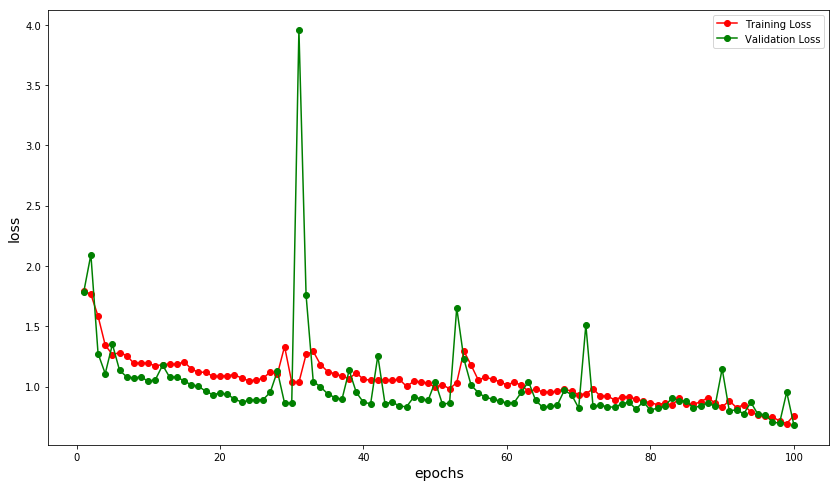

In [164]:
# Making the plot larger
plt.figure(figsize=(14, 8))

loss3 = history3.history['loss']                          # Loss on the training data
val_loss3 = history3.history['val_loss']                  # Loss on the validation data
epochs = range(1, 101)

plt.plot(epochs, loss3, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss3, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

Normalized confusion matrix


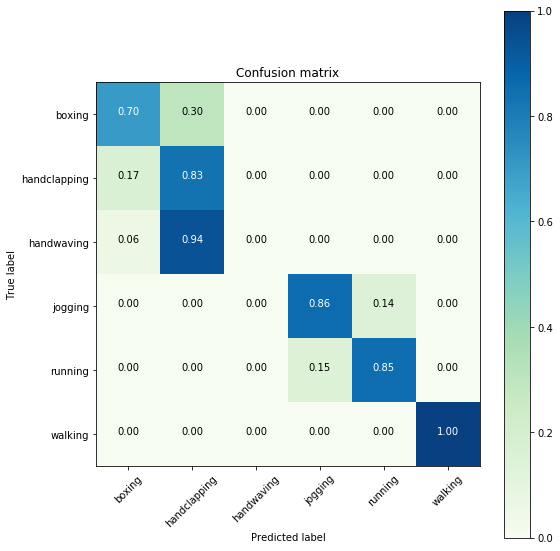

In [165]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions3 = model3.predict_classes(X_test);
y_pred3=to_categorical(y_predictions3, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);

#print y_predictions3[:50]
#print y_test[:50]
model_cnf_matrix3 = confusion_matrix(y_test_cm,y_pred3);
#print(model_cnf_matrix3)
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix3, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


## Model3 BG Subtraction

In [160]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, BatchNormalization
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model3_bg = Sequential()

# Adding Alternate convolutional and pooling layers
model3_bg.add(Conv3D(filters=16, kernel_size=(5, 5, 5), strides=(1, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model3_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3_bg.add(Conv3D(filters=64, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model3_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3_bg.add(Conv3D(filters=256, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model3_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

#model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 1024
model3_bg.add(GlobalAveragePooling3D())
model3_bg.add(Dropout(0.3))
# Hidden layer
model3_bg.add(Dense(64, activation='relu'))
model3_bg.add(Dropout(0.3))
model3_bg.add(Dense(32, activation='relu'))

# Dropout Layer
model3_bg.add(Dropout(0.5))

# Output layer
model3_bg.add(Dense(6, activation='softmax'))

model3_bg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_55 (Conv3D)           (None, 35, 20, 20, 16)    2016      
_________________________________________________________________
max_pooling3d_55 (MaxPooling (None, 18, 10, 10, 16)    0         
_________________________________________________________________
conv3d_56 (Conv3D)           (None, 18, 10, 10, 64)    27712     
_________________________________________________________________
max_pooling3d_56 (MaxPooling (None, 9, 5, 5, 64)       0         
_________________________________________________________________
conv3d_57 (Conv3D)           (None, 9, 5, 5, 128)      221312    
_________________________________________________________________
max_pooling3d_57 (MaxPooling (None, 5, 3, 3, 128)      0         
_________________________________________________________________
global_average_pooling3d_19  (None, 128)               0         
__________

In [148]:
##### Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model3_bg.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint3_bg = ModelCheckpoint(filepath='Model_3_bg.weights.best.hdf5', save_best_only=True, verbose=1)


history3_bg = model3_bg.fit(X_train_bgsub, y_train_bgsub, batch_size=15, epochs=100, 
                    validation_data=(X_valid_bgsub, y_valid_bgsub), verbose=1, callbacks=[checkpoint3_bg])

Train on 722 samples, validate on 122 samples
Epoch 1/100
722/722 [==============================] - 28s 39ms/step - loss: 1.6868 - acc: 0.2285 - val_loss: 1.7027 - val_acc: 0.1885

Epoch 00001: val_loss improved from inf to 1.70274, saving model to Model_3_bg.weights.best.hdf5
Epoch 2/100
722/722 [==============================] - 26s 36ms/step - loss: 1.4736 - acc: 0.3670 - val_loss: 1.4233 - val_acc: 0.3607

Epoch 00002: val_loss improved from 1.70274 to 1.42334, saving model to Model_3_bg.weights.best.hdf5
Epoch 3/100
722/722 [==============================] - 27s 37ms/step - loss: 1.3126 - acc: 0.3615 - val_loss: 1.1180 - val_acc: 0.4262

Epoch 00003: val_loss improved from 1.42334 to 1.11797, saving model to Model_3_bg.weights.best.hdf5
Epoch 4/100
722/722 [==============================] - 26s 36ms/step - loss: 1.1962 - acc: 0.4377 - val_loss: 0.9279 - val_acc: 0.5820

Epoch 00004: val_loss improved from 1.11797 to 0.92792, saving model to Model_3_bg.weights.best.hdf5
Epoch 5/10


Epoch 00039: val_loss did not improve from 0.27960
Epoch 40/100
722/722 [==============================] - 27s 37ms/step - loss: 0.2752 - acc: 0.9058 - val_loss: 0.5301 - val_acc: 0.8689

Epoch 00040: val_loss did not improve from 0.27960
Epoch 41/100
722/722 [==============================] - 26s 37ms/step - loss: 0.2148 - acc: 0.9155 - val_loss: 0.2898 - val_acc: 0.9180

Epoch 00041: val_loss did not improve from 0.27960
Epoch 42/100
722/722 [==============================] - 26s 36ms/step - loss: 0.3026 - acc: 0.9044 - val_loss: 0.3141 - val_acc: 0.9016

Epoch 00042: val_loss did not improve from 0.27960
Epoch 43/100
722/722 [==============================] - 26s 36ms/step - loss: 0.1845 - acc: 0.9280 - val_loss: 0.3002 - val_acc: 0.9016

Epoch 00043: val_loss did not improve from 0.27960
Epoch 44/100
722/722 [==============================] - 27s 37ms/step - loss: 0.2138 - acc: 0.9183 - val_loss: 0.2532 - val_acc: 0.9098

Epoch 00044: val_loss improved from 0.27960 to 0.25316, sav

722/722 [==============================] - 26s 36ms/step - loss: 0.0299 - acc: 0.9889 - val_loss: 0.5894 - val_acc: 0.9016

Epoch 00083: val_loss did not improve from 0.25316
Epoch 84/100
722/722 [==============================] - 26s 36ms/step - loss: 0.0688 - acc: 0.9806 - val_loss: 0.6550 - val_acc: 0.9016

Epoch 00084: val_loss did not improve from 0.25316
Epoch 85/100
722/722 [==============================] - 26s 37ms/step - loss: 0.0417 - acc: 0.9875 - val_loss: 0.6165 - val_acc: 0.9098

Epoch 00085: val_loss did not improve from 0.25316
Epoch 86/100
722/722 [==============================] - 26s 36ms/step - loss: 0.0949 - acc: 0.9806 - val_loss: 0.4703 - val_acc: 0.9180

Epoch 00086: val_loss did not improve from 0.25316
Epoch 87/100
722/722 [==============================] - 26s 36ms/step - loss: 0.0189 - acc: 0.9931 - val_loss: 0.5739 - val_acc: 0.9344

Epoch 00087: val_loss did not improve from 0.25316
Epoch 88/100
722/722 [==============================] - 26s 37ms/step - l

In [149]:
# Loading the model that performed the best on the validation set
model3_bg.load_weights('Model_3_bg.weights.best.hdf5')

# Testing the model on the Test data
(loss3_bg, accuracy3_bg) = model3_bg.evaluate(X_test_bgsub, y_test_bgsub, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy3_bg * 100))

Accuracy on test data: 96.00%


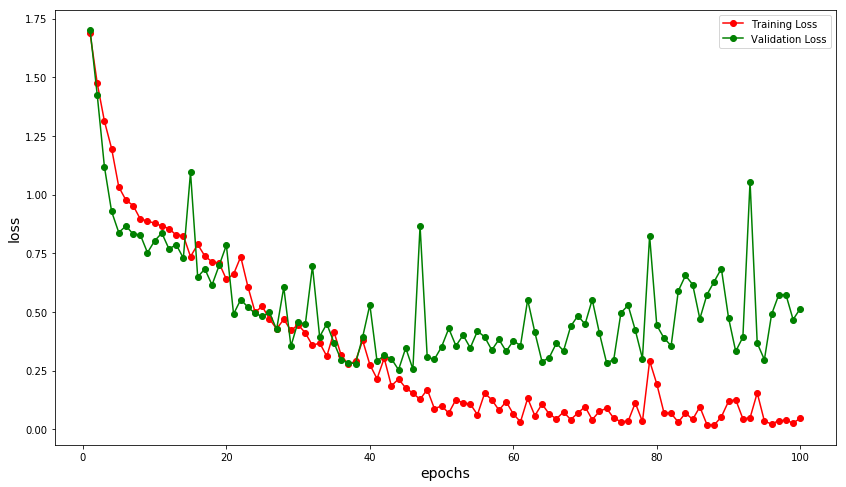

In [151]:
# Making the plot larger
plt.figure(figsize=(14, 8))

loss3_bg = history3_bg.history['loss']                          # Loss on the training data
val_loss3_bg = history3_bg.history['val_loss']                  # Loss on the validation data
epochs = range(1, 101)

plt.plot(epochs, loss3_bg, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss3_bg, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

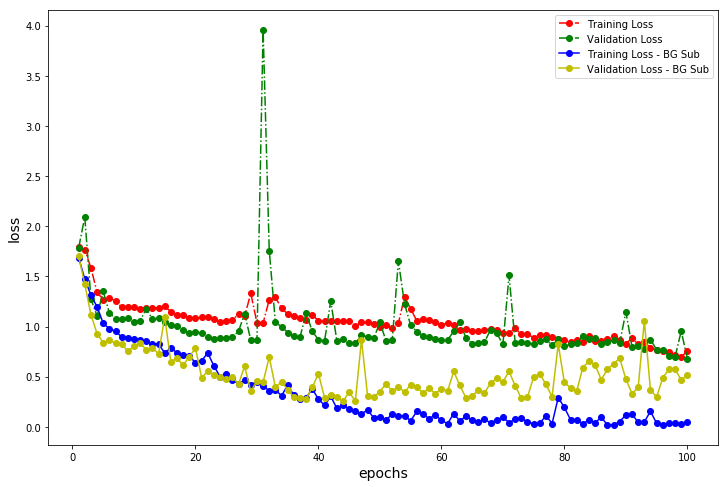

In [166]:
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss3, 'ro-.', label='Training Loss')
plt.plot(epochs, val_loss3, 'go-.', label = 'Validation Loss')
plt.plot(epochs, loss3_bg, 'bo-', label='Training Loss - BG Sub')
plt.plot(epochs, val_loss3_bg, 'yo-', label = 'Validation Loss - BG Sub')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

Normalized confusion matrix


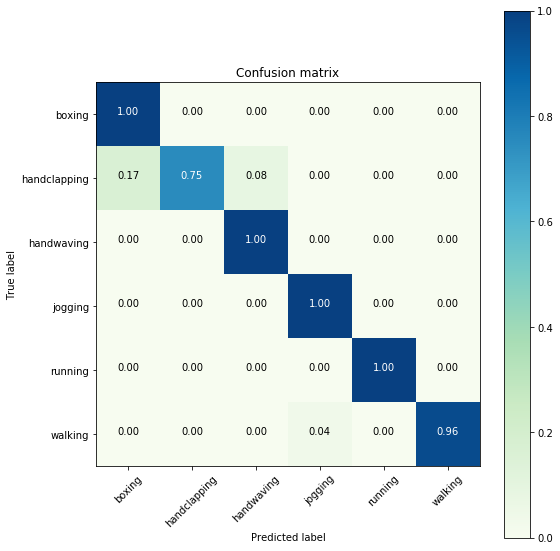

In [154]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions3_bg = model3_bg.predict_classes(X_test_bgsub);
y_pred3_bg=to_categorical(y_predictions3_bg, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:50]
#print y_test[:50]
model_cnf_matrix3_bg = confusion_matrix(y_test_cm,y_pred3_bg);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix3_bg, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)
